# Loblaws Digital 

In this notebook, we wants to help Loblaws to predict customer attrition and determine strategies that were sure to work to improve retention.
We will build a predictive model that can accurately identify customers who are at risk of leaving the company (churn) based on the provided variables.

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

### 1. Load the data

In [16]:
df = pd.read_csv('./loblaws.csv')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


### 2. filling missing values

In [17]:
# Drop the CustomerID column
df = df.drop('CustomerID', axis=1)

In [18]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [19]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [21]:
# Fill missing values for numerical columns with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [22]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### 3. EDA

#### Distribution of churn (Target variable)

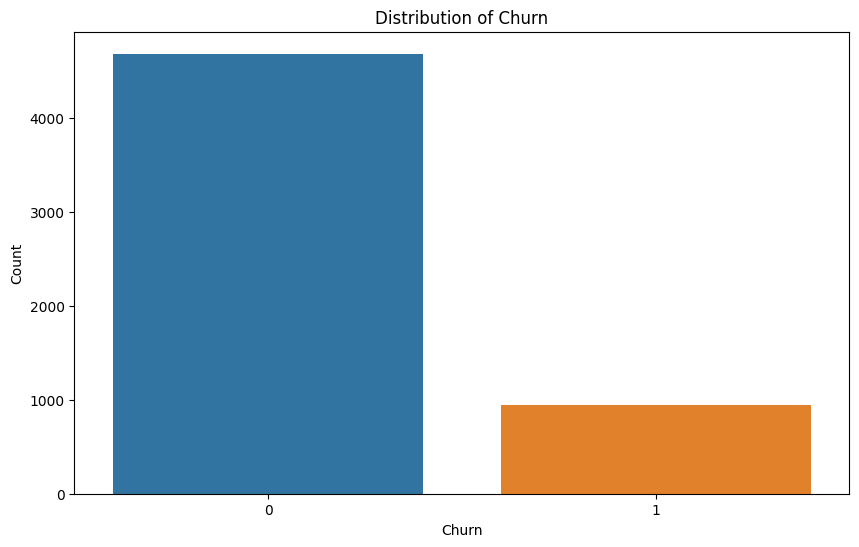

In [23]:
# Plot the distribution of Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


The majority of customers have not churned (Churn = 0), with the count significantly higher than the customers who have churned (Churn = 1).
This indicates an imbalance in the dataset, where non-churned customers are much more prevalent than churned customers.

#### Distribution of numerical features (with churn)

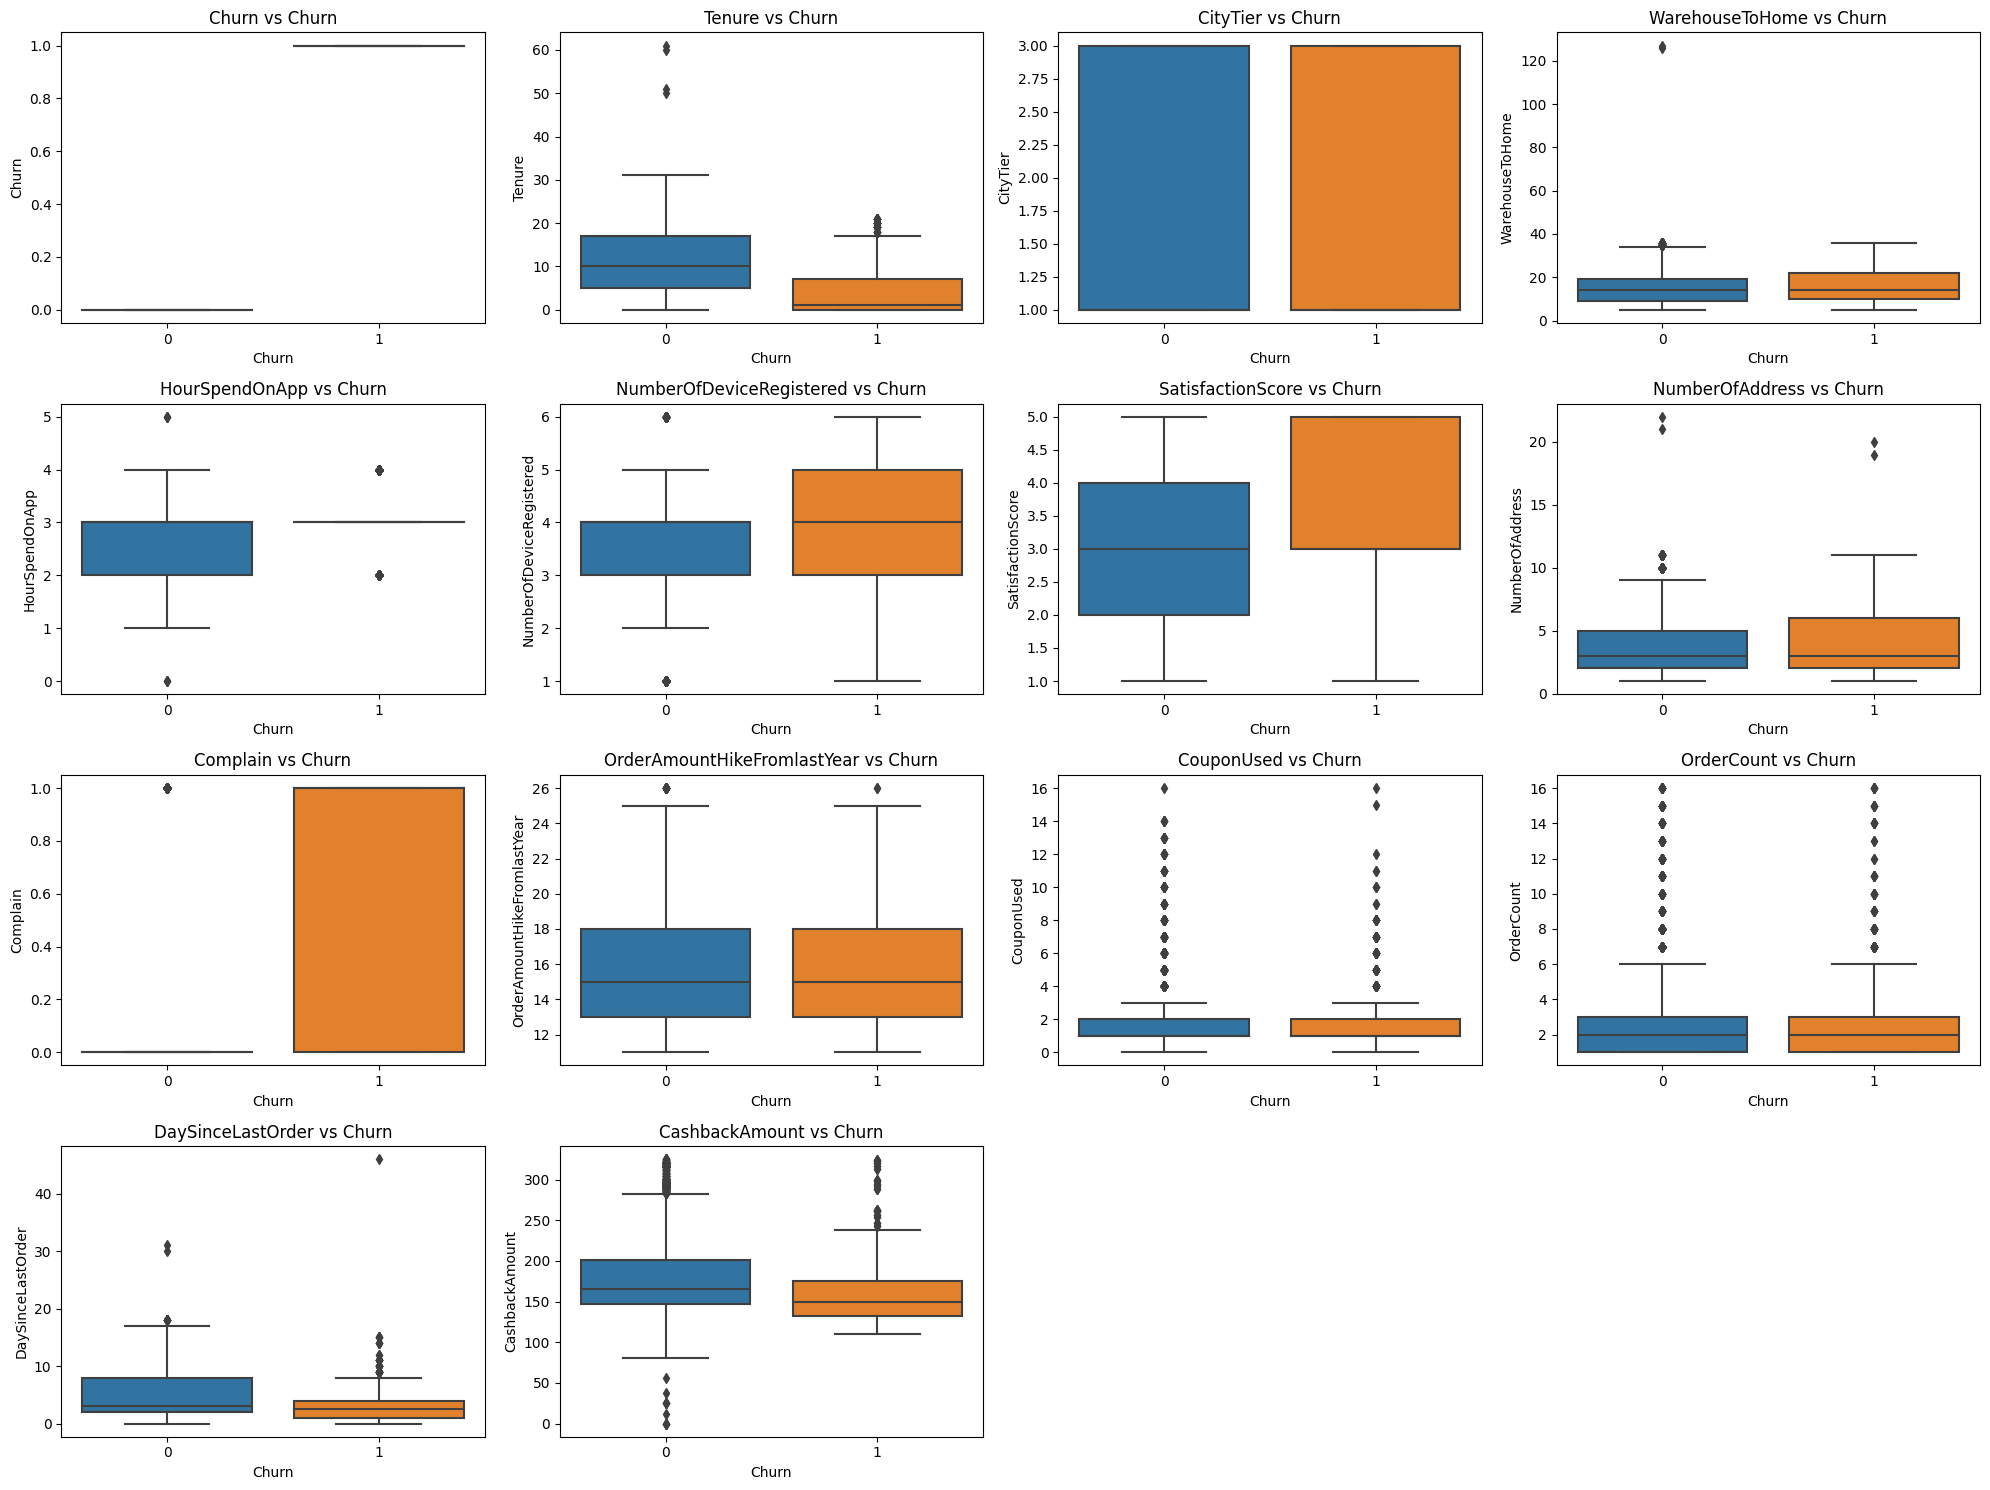

In [24]:
# Relationship with Churn
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f'{column} vs Churn')

plt.tight_layout()
plt.show()

1. Significant Difference in Churn Rate:

- Tenure vs Churn: Customers with shorter tenures are more likely to churn.
- HourSpendOnApp vs Churn: Churned customers tend to spend less time on the app compared to non-churned customers.
- SatisfactionScore vs Churn: Lower satisfaction scores are associated with higher churn rates.
- Complain vs Churn: Customers who have lodged complaints have a significantly higher churn rate.
- DaySinceLastOrder vs Churn: Customers who haven't ordered recently are more likely to churn.

2. Moderate Difference in Churn Rate:

- WarehouseToHome vs Churn: Customers living farther from the warehouse exhibit a slightly higher churn rate.
- NumberOfAddress vs Churn: Slightly higher churn rates are observed for customers with more registered addresses.
- CashbackAmount vs Churn: Higher cashback amounts are associated with lower churn rates.
- CouponUsed vs Churn: Higher coupon usage is associated with lower churn rates.
- OrderCount vs Churn: Higher order counts are associated with lower churn rates.

3. No Significant Difference in Churn Rate:

- CityTier vs Churn: No significant difference in churn rates across different city tiers.
- NumberOfDeviceRegistered vs Churn: No significant difference in churn rates based on the number of devices registered.
- OrderAmountHikeFromlastYear vs Churn: No significant difference in churn rates based on the order amount hike from last year.

#### Remove outliers (IQR) 

In [26]:
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[columns] >= (Q1 - 1.5 * IQR)) & (df[columns] <= (Q3 + 1.5 * IQR))
    return df[filter.all(axis=1)]

In [29]:
# Separate data into churned and non-churned customers
non_churned = df[df['Churn'] == 0]
churned = df[df['Churn'] == 1]
# Remove outliers for non-churned customers
non_churned_cleaned = remove_outliers_iqr(non_churned, numerical_cols)

# Combine the cleaned data
df_cleaned = pd.concat([churned, non_churned_cleaned])

df_cleaned

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


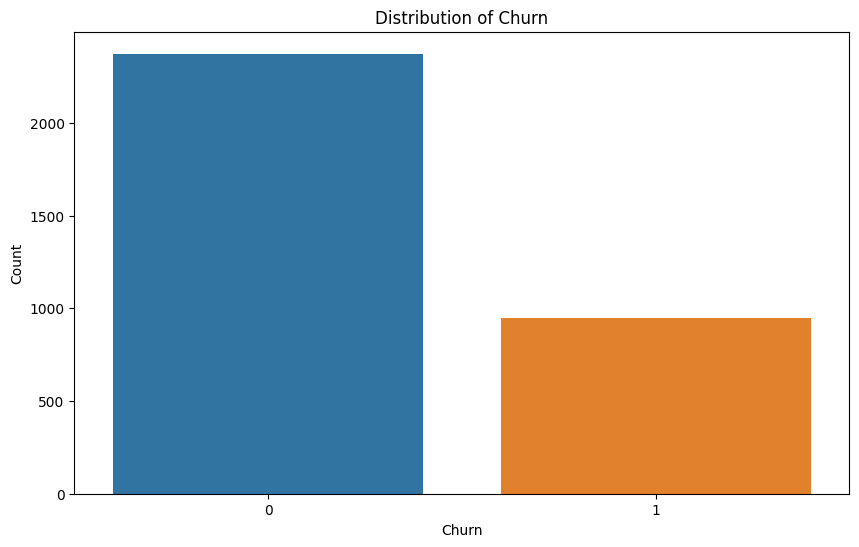

In [30]:
# Plot the distribution of Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df_cleaned)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#### Correlation heatmap

In [34]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

In [35]:
df_cleaned

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,2,1,12.0,0,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,1,3,12.0,6,0,2.0,5,4,3,2,2,0,19.0,2.0,2.0,1.0,155
5625,0,10.0,0,1,30.0,3,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,1,1,13.0,3,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,3.0,225
5628,0,23.0,0,3,9.0,3,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,179


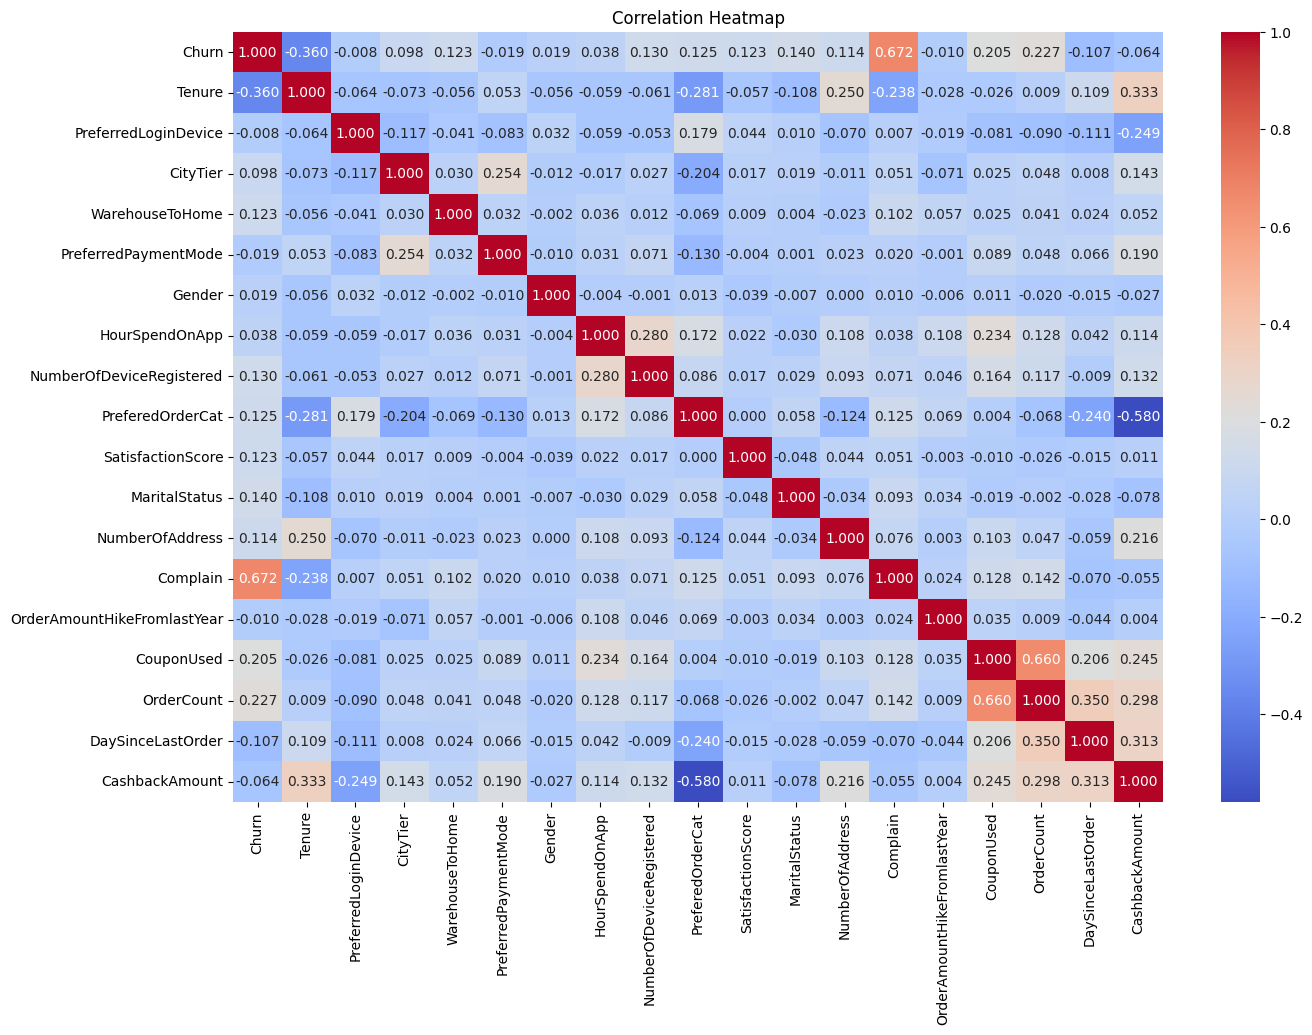

In [37]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned.corr().round(3), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

Strong Correlation with Churn:
- Tenure (-0.360): Customers with longer tenures are less likely to churn.
- OrderCount (-0.227): Higher order counts are associated with lower churn rates.
- Complain (0.672): Customers who have lodged complaints are significantly more likely to churn.

High Collinearity Among Features:
- CouponUsed and OrderCount (0.660): High positive correlation.


#### Feature Selection

In [38]:
# Select features with correlation > 0.1 with Churn, excluding 'CouponUsed'
corr_matrix = df_cleaned.corr()
selected_features = corr_matrix.index[(corr_matrix['Churn'].abs() > 0.1) & (corr_matrix.index != 'CouponUsed')].tolist()
selected_features.remove('Churn')  # Remove 'Churn' from the list of features

# Display selected features
print("Selected Features:", selected_features)

Selected Features: ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderCount', 'DaySinceLastOrder']


### 4. Preprocessing

#### Split the data into train and test sets

In [40]:
X = df_cleaned[selected_features]
y = df_cleaned['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normalization

In [44]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5. Model Selection

In [46]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

### 6. Model Evaluation

Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       450
           1       0.96      0.68      0.80       215

    accuracy                           0.89       665
   macro avg       0.91      0.84      0.86       665
weighted avg       0.90      0.89      0.88       665



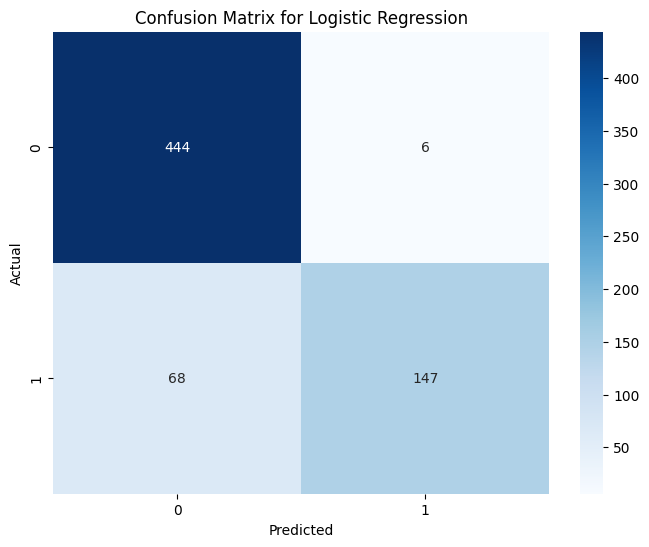

Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       450
           1       0.93      0.95      0.94       215

    accuracy                           0.96       665
   macro avg       0.95      0.96      0.96       665
weighted avg       0.96      0.96      0.96       665



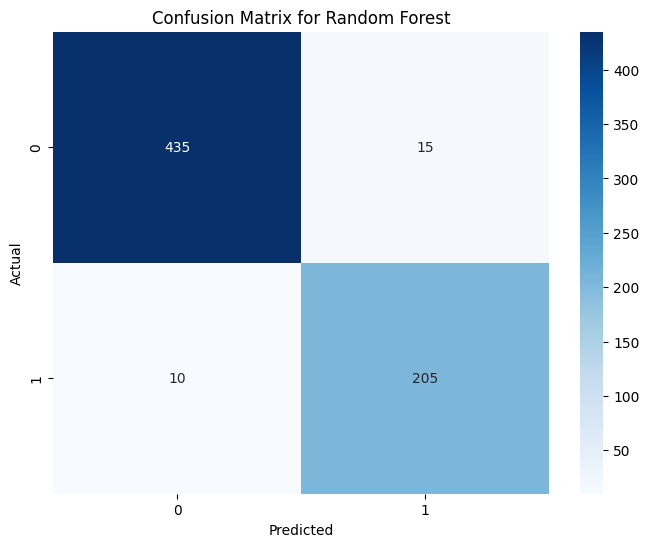

Training Support Vector Machine...
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       450
           1       0.96      0.75      0.85       215

    accuracy                           0.91       665
   macro avg       0.93      0.87      0.89       665
weighted avg       0.92      0.91      0.91       665



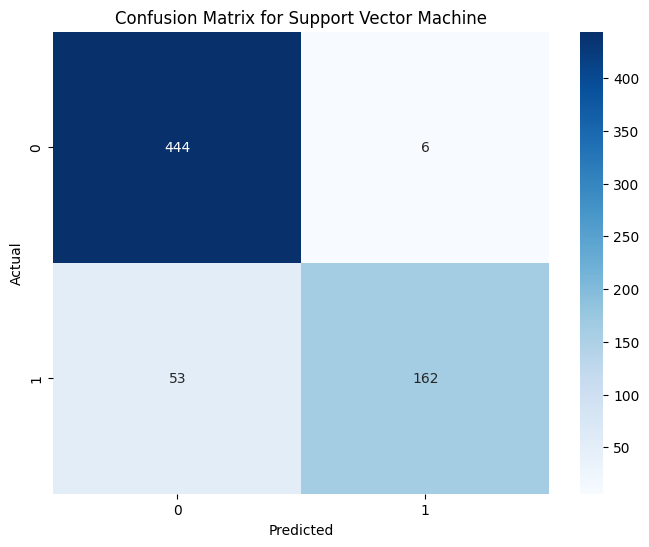

In [47]:
# Train the models and evaluate them
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### 7. Conclusion

- Logistic Regression:
High overall accuracy (0.89) and high recall for class 0 (0.99), but relatively low recall for class 1 (0.68).
This indicates the model struggles to identify churn (class 1) effectively.

- Random Forest:
Achieved the highest accuracy (0.96) with balanced performance across all metrics.
Notably, it has high recall (0.95) and F1-score (0.94) for class 1, indicating strong performance in identifying churn.

- Support Vector Machine (SVM):
High overall accuracy (0.91) and high recall for class 0 (0.99).
However, recall for class 1 (0.75) is lower compared to Random Forest, suggesting it is less effective in identifying churn.

- Recommended Model:
<b>Random Forest</b> stands out as the best model, with the highest accuracy and well-balanced performance across all metrics. It excels particularly in identifying churn (class 1), making it the most suitable model for Loblaws Digital's customer attrition prediction task.